# Optimization using Gradients: The Analytical Method

In this lesson, we'll use a more complex optimization example that introduces one of the most important models in machine learning: **linear regression**. We will use our knowledge of partial derivatives to find the "line of best fit" for a set of data points analytically.

### The 2D Power Line Problem
Imagine our power lines are now points on a 2D plane. We need to run a straight fiber optic cable (our "line") in a way that minimizes the cost of connecting each power line to it.

* **Constraint:** The connection wires must run vertically.
* **Cost:** The cost for each connection is the **square of the length** of that vertical wire.

The goal is to find the optimal parameters for our line, `y = mx + b`—the **slope (m)** and **y-intercept (b)**—that minimize the total cost.

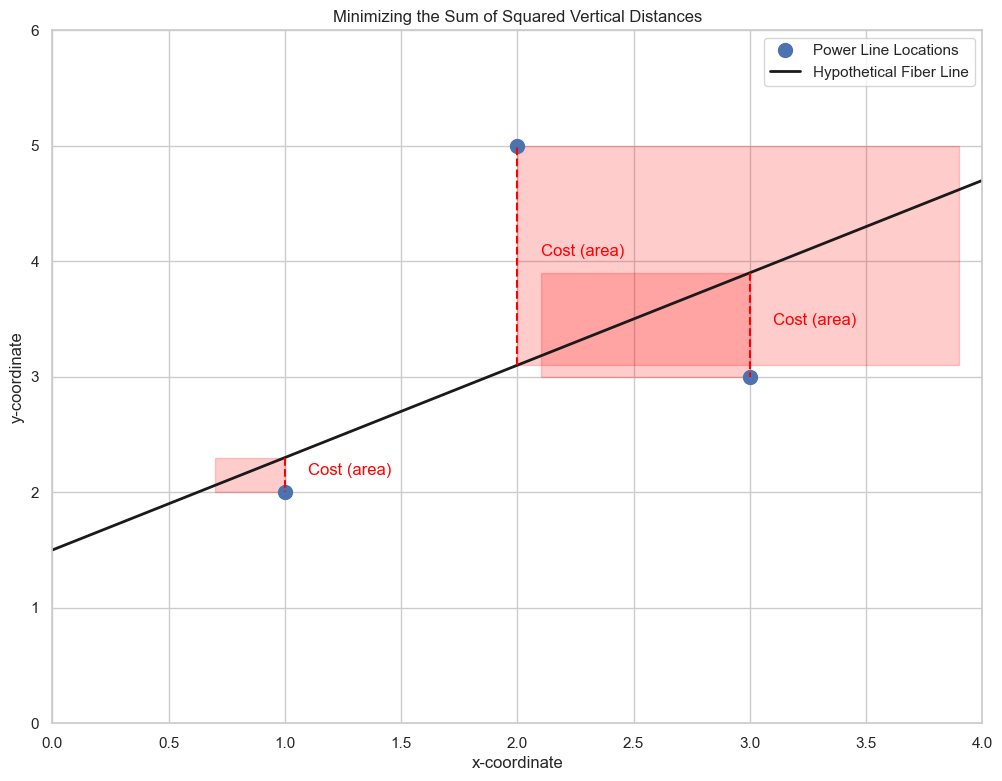

In [6]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the power line locations (x, y) ---
power_lines = np.array([[1, 2], [2, 5], [3, 3]])

# --- Define a hypothetical line y = mx + b ---
m_hypothetical = 0.8
b_hypothetical = 1.5
def line(x):
    return m_hypothetical * x + b_hypothetical

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the power line points
ax.plot(power_lines[:, 0], power_lines[:, 1], 'bo', markersize=10, label='Power Line Locations')

# Plot the hypothetical fiber line
x_vals = np.linspace(0, 4, 100)
ax.plot(x_vals, line(x_vals), 'k-', linewidth=2, label='Hypothetical Fiber Line')

# --- Visualize the costs (squared distances) ---
for p in power_lines:
    x_p, y_p = p[0], p[1]
    y_line = line(x_p)
    distance = y_p - y_line
    
    # Draw the vertical connection wire
    ax.vlines(x=x_p, ymin=y_line, ymax=y_p, color='red', linestyle='--')
    
    # Draw the square representing the cost
    ax.add_patch(Rectangle((x_p, y_line), distance, distance, 
                           facecolor='red', alpha=0.2, edgecolor='red'))
    ax.text(x_p + 0.1, y_line + distance/2, 'Cost (area)', color='red')


# --- Format the plot ---
ax.set_title('Minimizing the Sum of Squared Vertical Distances')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
ax.legend()
ax.grid(True)
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)

plt.show()

---

## Formulating the Cost Function

The vertical distance for any power line at $(x_i, y_i)$ to the line $y = mx + b$ is the difference in their y-values: $(y_i - (mx_i + b))$.

The cost for that single point is this distance squared. The total cost, `E(m, b)`, is the sum of the costs for all three points.

* **Cost for Point 1 (1, 2):** $(2 - (m(1) + b))^2 = (2 - m - b)^2$
* **Cost for Point 2 (2, 5):** $(5 - (m(2) + b))^2 = (5 - 2m - b)^2$
* **Cost for Point 3 (3, 3):** $(3 - (m(3) + b))^2 = (3 - 3m - b)^2$

**Total Cost Function:**
$$ E(m, b) = (2 - m - b)^2 + (5 - 2m - b)^2 + (3 - 3m - b)^2 $$

After expanding and combining like terms, this polynomial becomes:
$$ E(m, b) = 14m^2 + 3b^2 + 38 + 12mb - 42m - 20b $$

This is the function we need to minimize. Our variables are now `m` and `b`.

---
## Optimization with Partial Derivatives

To find the minimum of this function, we need to find the point where the gradient is the zero vector. This means we must calculate the partial derivatives with respect to `m` and `b` and set them both to zero.

* **Partial derivative with respect to `m`:**
  $$ \frac{\partial E}{\partial m} = 28m + 12b - 42 $$

* **Partial derivative with respect to `b`:**
  $$ \frac{\partial E}{\partial b} = 6b + 12m - 20 $$

Now, we set both equations to zero to find the optimal `m` and `b`:
1.  $28m + 12b - 42 = 0$  

2.  $12m + 6b - 20 = 0$

This is a 2x2 system of linear equations, which we can solve.
1.  From the second equation, we can isolate `b`: $6b = 20 - 12m \implies b = \frac{20-12m}{6}$.  

2.  Substitute this into the first equation: $28m + 12(\frac{20-12m}{6}) - 42 = 0$.  

3.  $28m + 2(20-12m) - 42 = 0 \implies 28m + 40 - 24m - 42 = 0$.  

4.  $4m - 2 = 0 \implies \boldsymbol{m = 0.5}$.  

5.  Substitute `m=0.5` back into the equation for `b`: $b = \frac{20-12(0.5)}{6} = \frac{20-6}{6} = \frac{14}{6} \approx \boldsymbol{2.33}$.

The optimal line that minimizes the sum of squared errors has a slope of **0.5** and a y-intercept of approximately **2.33**. This process is called **Linear Regression**.

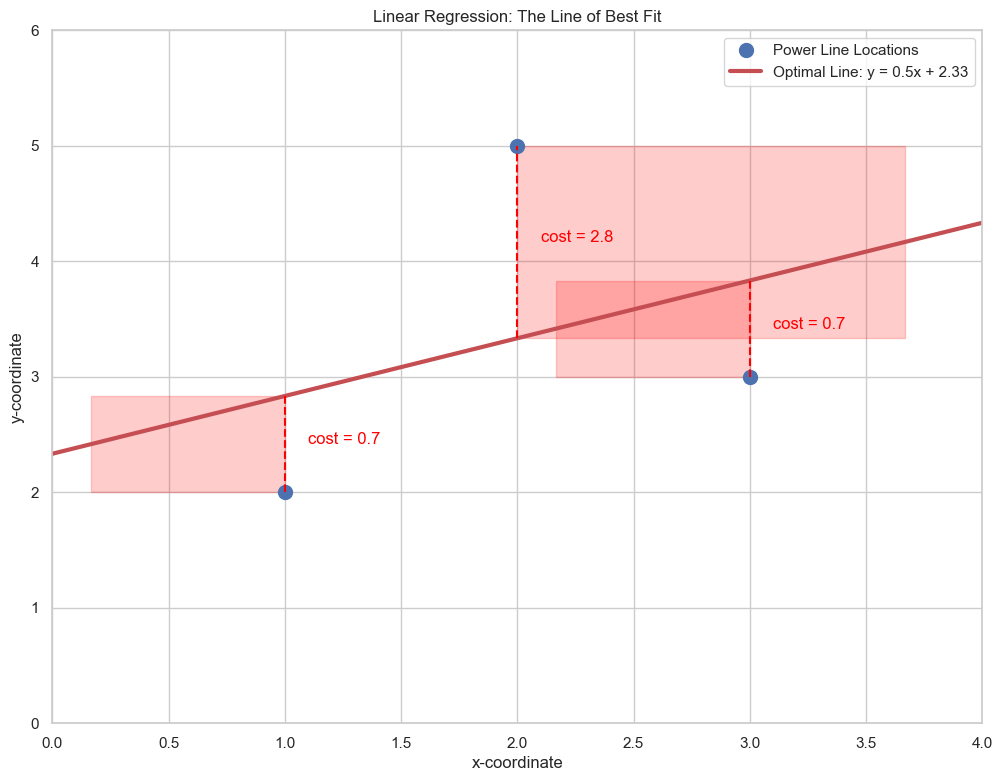

In [4]:
# --- Visualize the final solution ---
m_optimal = 0.5
b_optimal = 14/6

def optimal_line(x):
    return m_optimal * x + b_optimal

fig, ax = plt.subplots(figsize=(12, 9))

# Plot the power line points
ax.plot(power_lines[:, 0], power_lines[:, 1], 'bo', markersize=10, label='Power Line Locations')

# Plot the optimal fiber line (line of best fit)
x_vals = np.linspace(0, 4, 100)
ax.plot(x_vals, optimal_line(x_vals), 'r-', linewidth=3, label=f'Optimal Line: y = {m_optimal}x + {b_optimal:.2f}')

# --- Visualize the minimized squared errors ---
for p in power_lines:
    x_p, y_p = p[0], p[1]
    y_line = optimal_line(x_p)
    distance = y_p - y_line
    ax.vlines(x=x_p, ymin=y_line, ymax=y_p, color='red', linestyle='--')
    ax.add_patch(Rectangle((x_p, y_line), distance, distance, 
                           facecolor='red', alpha=0.2, edgecolor='red'))
    ax.text(x_p + 0.1, y_line + distance/2, f'cost = {distance**2:.1f}', color='red')


ax.set_title('Linear Regression: The Line of Best Fit')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
ax.legend()
ax.grid(True)
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)

plt.show()

---

## The Problem with the Analytical Method

Solving this system of equations was manageable for two variables (`m` and `b`). But what if our model had hundreds or thousands of features? We would have to solve a system with hundreds or thousands of variables, which is computationally very expensive and complex.

This motivates the need for an alternative, iterative method to find the minimum of the cost function. This method is called **Gradient Descent**.